In [28]:
!pip install qiskit qiskit-aer pylatexenc qrcode[pil] --quiet


In [29]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import qrcode
from PIL import Image
from IPython.display import display


In [30]:
n = 7  # Number of bits for ASCII
def char_to_binary(char):
    return bin(ord(char))[2:].zfill(n)

def bv_circuit(binary_string):
    qc = QuantumCircuit(n + 1, n)
    qc.h(n)
    qc.z(n)
    qc.h(range(n))
    for idx, bit in enumerate(reversed(binary_string)):
        if bit == '1':
            qc.cx(idx, n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc


In [31]:
def run_and_plot_each(word, shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    for char in word:
        binary = char_to_binary(char)
        qc = bv_circuit(binary)
        tqc = transpile(qc, backend)
        job = backend.run(tqc, shots=shots)
        result = job.result()
        counts = result.get_counts()
        print(f"Letter: '{char}' | Binary: {binary}")
        print("Counts:", counts)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        # Draw circuit on the left
        qc.draw(output='mpl', ax=axs[0])
        axs[0].set_title(f"BV Circuit for '{char}'")
        # Plot histogram on the right with blue bars
        plot_histogram(counts, ax=axs[1], color='blue')
        axs[1].set_title(f"Measurement results for '{char}'")
        plt.tight_layout()
        plt.show()


In [32]:
def generate_qr_code(data, filename="qr_code.png"):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)
    display(img)
    print(f"QR Code saved as {filename}")


Enter the word to encode and visualize quantum circuits: hi there!
Letter: 'h' | Binary: 1101000
Counts: {'1101000': 1024}


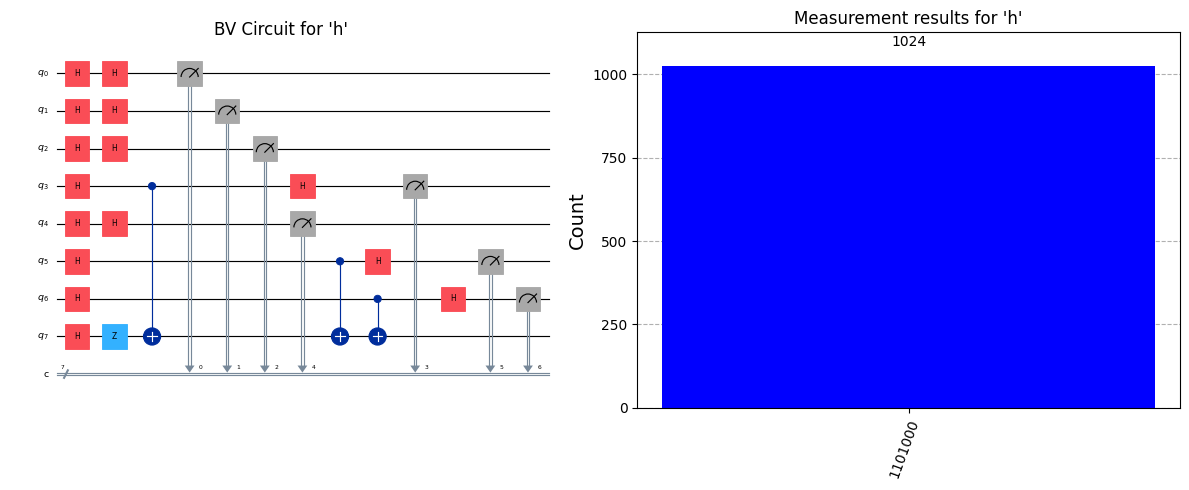

Letter: 'i' | Binary: 1101001
Counts: {'1101001': 1024}


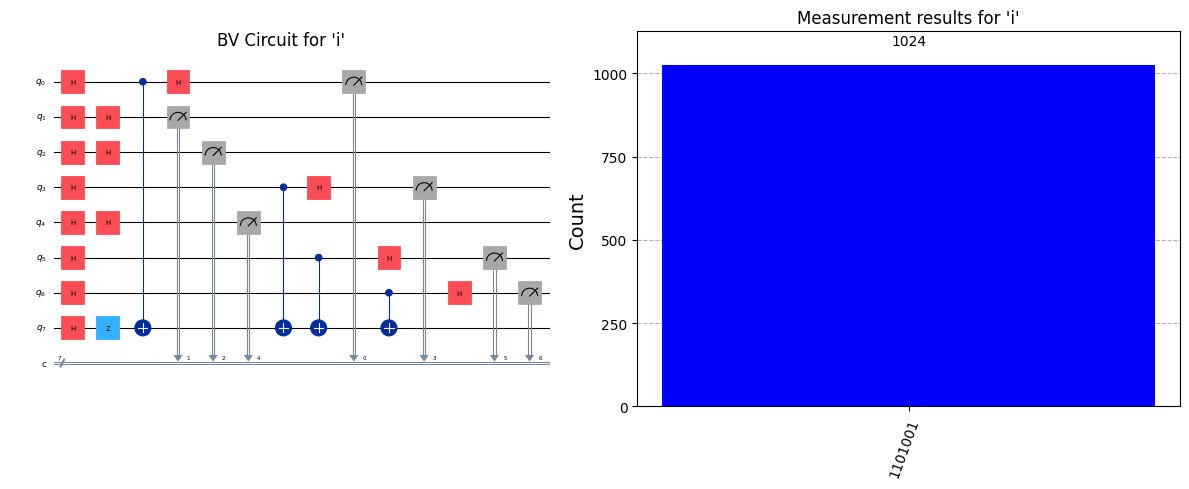

Letter: ' ' | Binary: 0100000
Counts: {'0100000': 1024}


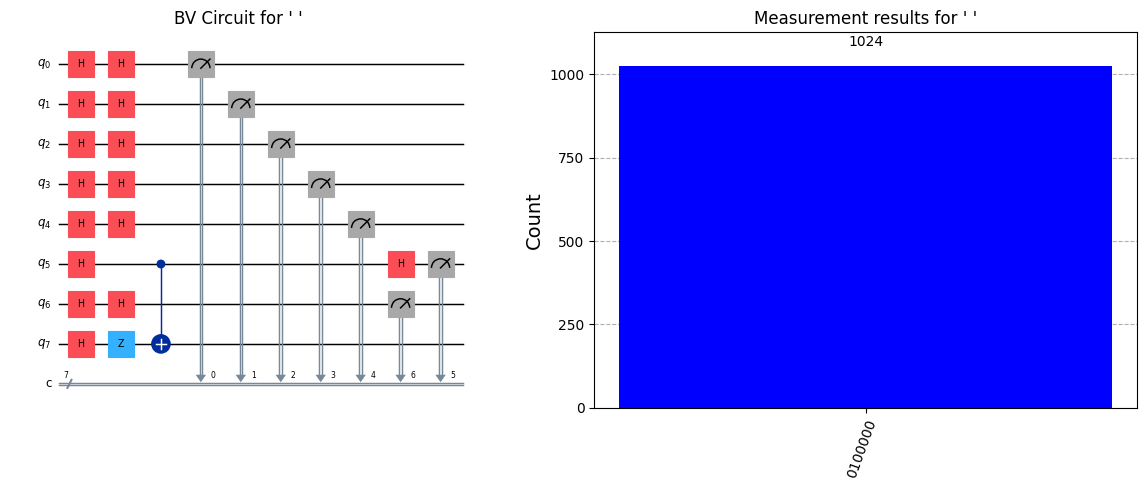

Letter: 't' | Binary: 1110100
Counts: {'1110100': 1024}


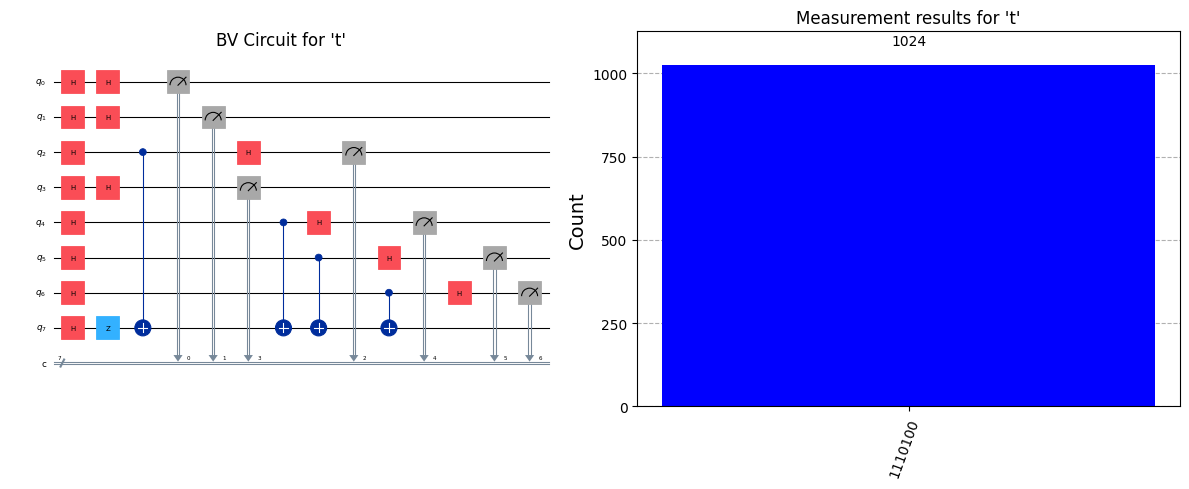

Letter: 'h' | Binary: 1101000
Counts: {'1101000': 1024}


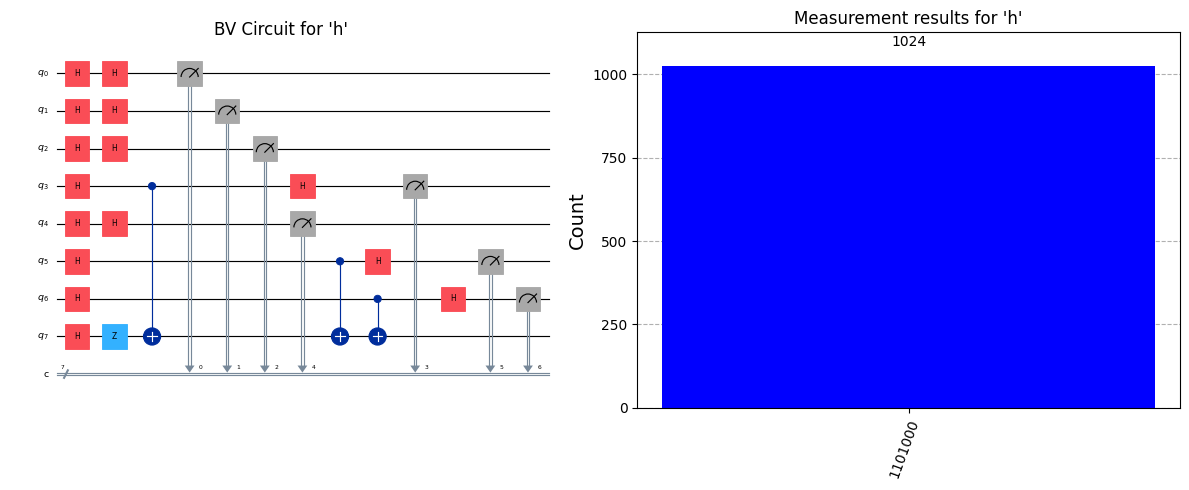

Letter: 'e' | Binary: 1100101
Counts: {'1100101': 1024}


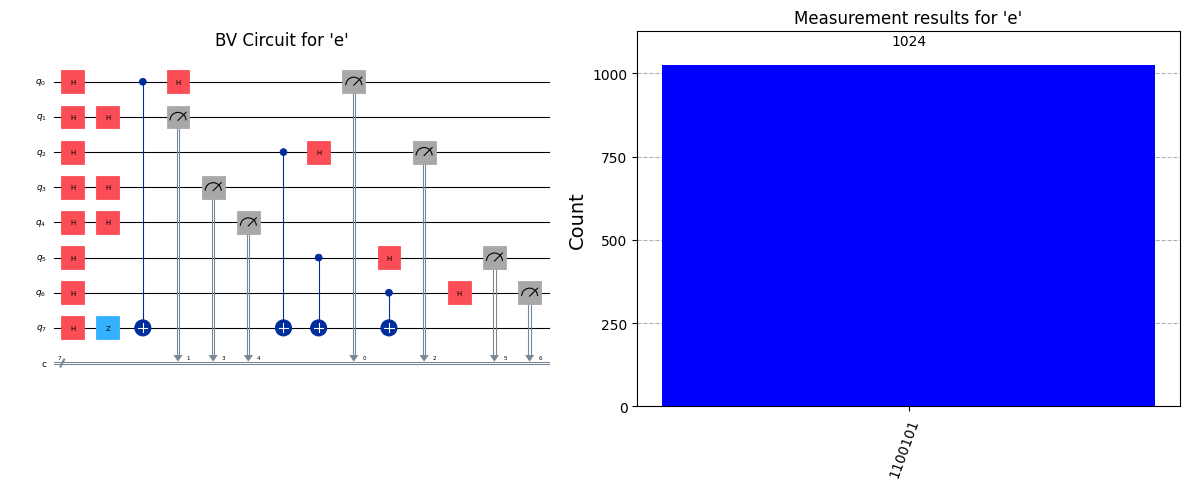

Letter: 'r' | Binary: 1110010
Counts: {'1110010': 1024}


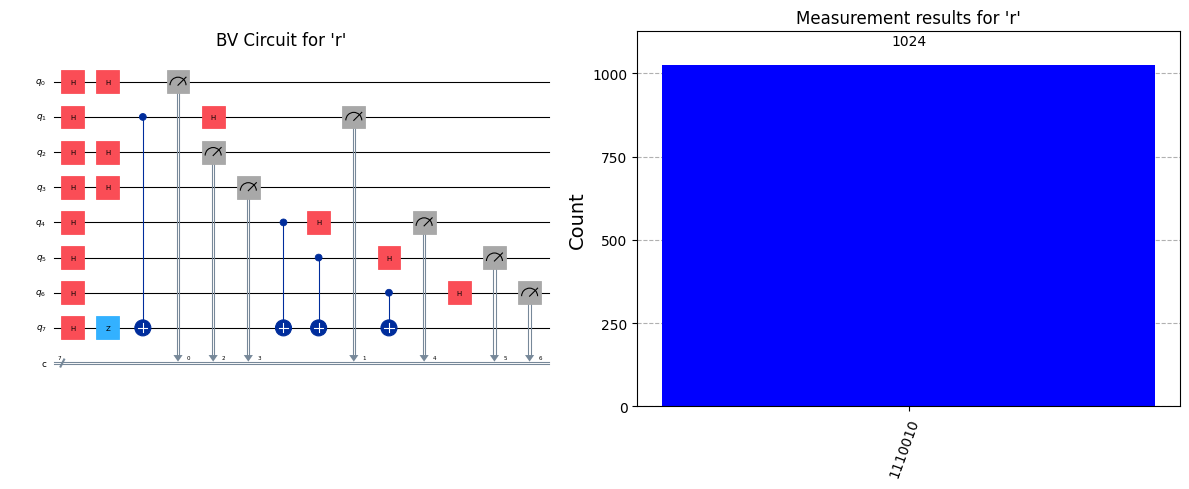

Letter: 'e' | Binary: 1100101
Counts: {'1100101': 1024}


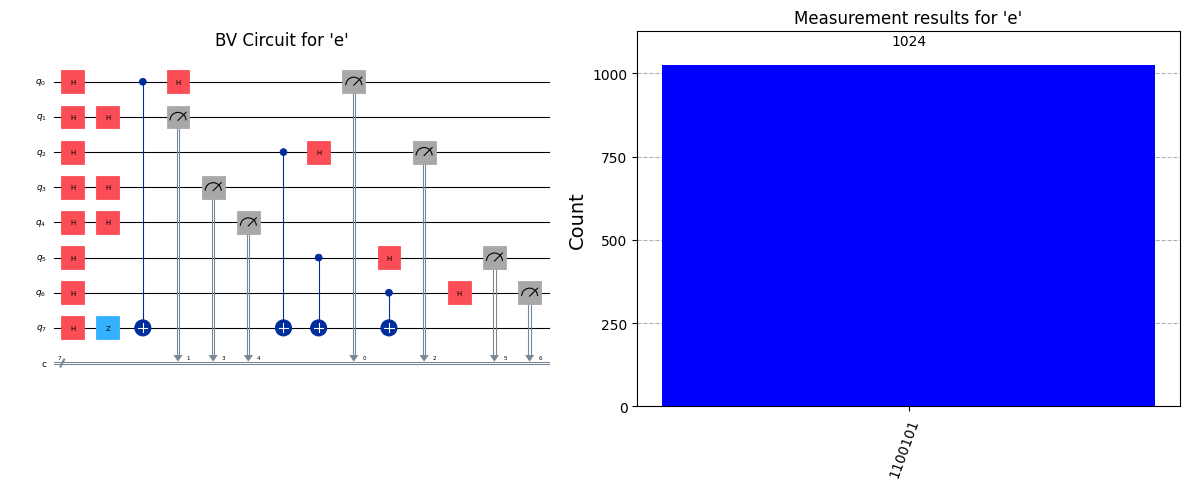

Letter: '!' | Binary: 0100001
Counts: {'0100001': 1024}


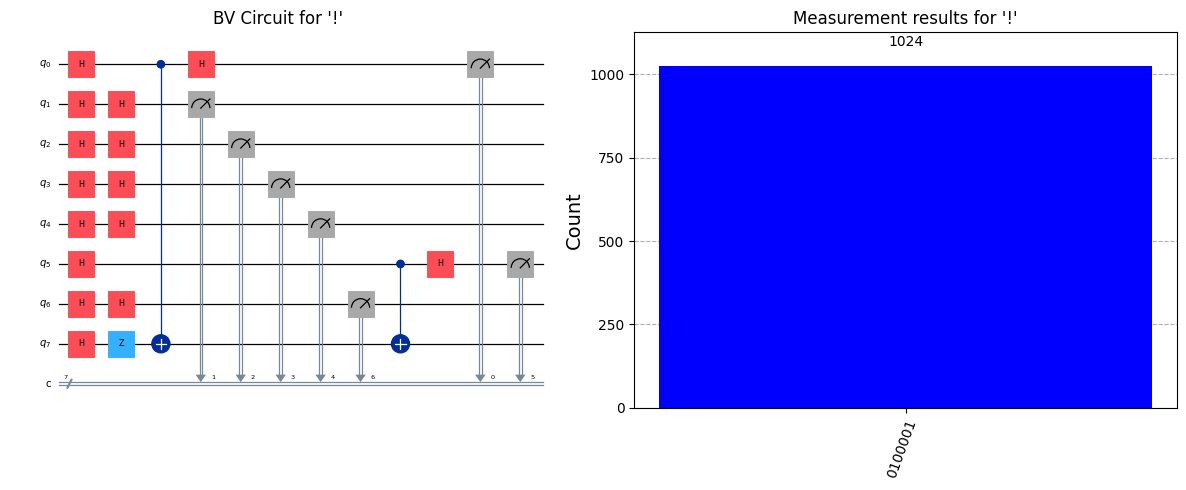

Generating QR code for the original string: hi there!




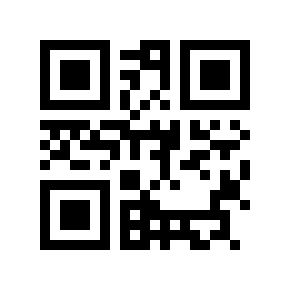

QR Code saved as quantum_string_qr.png


In [33]:
word = input("Enter the word to encode and visualize quantum circuits: ")

run_and_plot_each(word)
print(f"Generating QR code for the original string: {word}")
print("\n")
generate_qr_code(word, "quantum_string_qr.png")
